# 5. Data Inputs

## 5.1 Data Inputs SATIM



In [1]:
from IPython.display import display, Image, Markdown

# Specify the path to your local image file
image_path = '/content/sankey 2017.jpg'

# Display the image
display(Image(filename=image_path))

# Add a caption using Markdown
caption = " SANKEY diagram of the South African Energy System in 2017. This section presents the main databases used to build a representation of this system in SATIM"
display(Markdown(f"**{caption}**"))

FileNotFoundError: [Errno 2] No such file or directory: '/content/sankey 2017.jpg'



 ### 5.1.1 Main data sources
  #### 5.1.1.1 Energy Balance of South Africa
 A detailed description of the 2012 year energy balance calibration can be found in (Hartley, 2018), the 2017 documentation still in progress.
  ### 5.1.1.2 Other Key Databases

### 5.1.2 Global Parameters
 #### 5.1.2.1 Year Split
 SATIM uses time slices to model typical end-use load profiles and RE resource availability for winter and summer. The load profiles include a morning and evening peak and nighttime period with lower average demand. The winter evening peak time slice is used to determine the system peak demand up to which the system must build firm dispatchable capacity with a 15% reserve margin.
Temporal changes in daily and seasonal demand in the lowest resolution version of SATIM are represented by two seasons and one day type. Winter days consist of 5 time slices and summer three time slices. The highest resolution version currently allows for 72 time slices, representing 2 winter and 2 summer days. The temporal resolution is applied to end-use demand and RE, apart from transport where demand is defined annually.

 ### 5.1.3 Demands

 Primary drivers of demand are population and GDP. Population growth directly impacts the demand for energy in the residential and transport sectors and indirectly in all other demand sectors. Population growth follows the central (median) case from the World Population Prospects 2019 (DESA, 2019), increasing to 75.5 million in 2050. Whilst population forecasts are generally kept constant in all scenarios, GDP growth can change in response to prices or policy targets etc. GDP growth in each economic sector, along with anticipated household income levels, is drawn from a CGE model. While CGE models are not forecasting tools, they do generate economically consistent paths of economic growth, including sector growth, employment and household welfare, for a given set of assumptions.


 #### 5.1.4 Power Sector
  #### 5.1.4.1 Power Tecnologies



# Onshore Wind Cost Data Inputs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import display, Image, Markdown

# Specify the path to your local image file
image_path = '/content/WASA_3_Resource_Map_March_2021.png'

# Display the image
display(Image(filename=image_path))

# Add a caption using Markdown
caption = "WASA Resource Map (March 2021). Source:SANEDI (n.d.). Wind Atlas for South Africa (WASA) . [online] www.wasaproject.info. Available at: https://www.wasaproject.info/."
display(Markdown(f"**{caption}**"))


In [ ]:
import openpyxl
import pandas as pd
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.excel")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.drawings")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.worksheet._reader")

# Load data from Excel sheet
file_path = r'/content/drive/MyDrive/Doc SATIM/VT_REGION1_ELC.xlsx'
sheet_name = 'ProcDataRECostProfiles'
data_range_cells_1 = 'G12:M12'
data_range_cells_2 = 'G24:M24'

# Load workbook and select the sheet
wb = openpyxl.load_workbook(file_path, data_only=True)
sheet = wb[sheet_name]

# Extract data from the first range into a DataFrame
data_1 = sheet[data_range_cells_1]
columns_1 = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Reference']
df_1 = pd.DataFrame([[cell.value for cell in row] for row in data_1], columns=columns_1)

# Extract data from the second range into a DataFrame
data_2 = sheet[data_range_cells_2]
columns_2 = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Reference']
df_2 = pd.DataFrame([[cell.value for cell in row] for row in data_2], columns=columns_2)

# Combine the two DataFrames along the rows (axis=0)
df_combined = pd.concat([df_1, df_2], axis=0)

# Replace "null" and NaN with blanks
df_combined.replace(["null", "#DIV/0!", float("nan")], "", inplace=True)

# Round all numbers to two decimal places
df_combined = df_combined.round(2)

# Specify row headers
df_combined.index = ['Overnight Cost (2022 ZAR/kW)', 'LCOE (2022 R/kWh)']

# Specify column headers
column_names = ['2017', '2020', '2025', '2030', '2040', '2050', 'References']
df_combined.columns = column_names

# Display the final DataFrame
df_combined




In [ ]:
import openpyxl
import pandas as pd
from tabulate import tabulate
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.excel")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.drawings")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.worksheet._reader")

# Enable data_table formatter in Google Colab
try:
    from google.colab import data_table
    data_table.enable_dataframe_formatter()
except ImportError:
    pass  # If not in Colab, ignore the import error

# Load data from Excel sheet
file_path = r'/content/drive/MyDrive/Doc SATIM/VT_REGION1_ELC.xlsx'
sheet_name = 'IRP Costs'
data_range_cells = 'T12:T18'

# Load workbook and select the sheet
wb = openpyxl.load_workbook(file_path, data_only=True)
sheet = wb[sheet_name]

# Extract data from the specified range into a DataFrame
columns = ['Value']
df_combined = pd.DataFrame([[cell.value] for row in sheet[data_range_cells] for cell in row], columns=columns)

# Replace "null" and NaN with blanks
df_combined.replace(["null", "#DIV/0!", float("nan")], "", inplace=True)

# Round all numbers to two decimal places
df_combined = df_combined.round(2)

# Specify row headers
row_headers = ['Total Overnight Cost (2022 R/kW)',
               'Fixed O&M Cost (2022 R/kW/year)',
               'Variable O&M Cost (2022 R/MWh)',
               'Fuel Cost (2022 R/GJ)',
               'Other Direct Costs (%)',
               'Overnight Cost incl. ODC (2022 R/kW)',
               'Efficiency']

# Add a heading
heading = 'Wind Cost Data - IRP 2019 (2022 ZAR)'
print(f"\n{heading}\n")

# Create the final DataFrame with specified row headers
df_combined = pd.DataFrame({'Value': df_combined['Value'].tolist()}, index=row_headers)

# Add a new column for the reference (single cell for all rows)
reference = 'Department of Mineral Resources and Energy (2019a). Integrated Resource Plan (IRP2019). [online] Available at: https://www.energy.gov.za/IRP/2019/IRP-2019.pdf.'
df_combined['Reference'] = reference

# Reorder columns to have 'Reference' on the right
df_combined = df_combined[['Value', 'Reference']]

# Display the final DataFrame
display(df_combined)



In [ ]:
%matplotlib inline
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.excel")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.drawings")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.worksheet._reader")

# Load data from Excel sheet
file_path = '/content/drive/MyDrive/Doc SATIM/VT_REGION1_ELC.xlsx'
sheet_name = 'ProcDataRECostProfiles'

# Load workbook and select the sheet
wb = openpyxl.load_workbook(file_path, data_only=True)
sheet = wb[sheet_name]

# Extract sources and data for the plot
sources_range = 'A49:A61'
data_range = 'H49:L61'

sources = [cell[0].value for cell in sheet[sources_range]]
data = [[cell.value for cell in row] for row in sheet[data_range]]

# Create a DataFrame
df = pd.DataFrame(data, columns=['2020', '2025', '2030', '2040', '2050'], index=sources)

# Filter out blank values from the DataFrame
df = df.dropna()

# Plot the data
plt.figure(figsize=(10, 6))
df.T.plot(marker='o', linestyle='-', ax=plt.gca())

# Add labels and grid
plt.title('Overnight Wind Costs Comparison (2022 R/kW)')
plt.xlabel('Year')
plt.ylabel('Overnight Wind Costs (2022 R/kW)')
plt.grid(True)

# Add legend
plt.legend(title='Sources', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
# HIDE CODE
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(5, 5))
df.style \
  .hide(subset=[0, 2, 4], axis=0) \
  .hide(subset=[0, 2, 4], axis=1)

,1,3
1,-2.984868,2.665120
3,0.677918,-0.703406


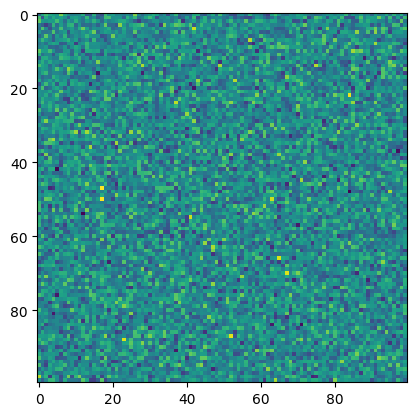

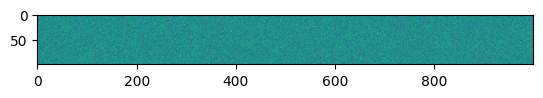

In [5]:
from matplotlib import pyplot as plt
# Hide input
square = np.random.randn(100, 100)
wide = np.random.randn(100, 1000)

fig, ax = plt.subplots()
ax.imshow(square)

fig, ax = plt.subplots()
ax.imshow(wide)

```{note} Notes require **no** arguments,
so content can start here.
```

```{code-cell} ipython3
:tags: [hide-input]

import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));
```


In [ ]:
{
    "tags": [
        "remove-input"
    ]
}